In [1]:
import operator
import unittest

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from graphs import datasets
from measure.distance import Distance
from measure.kernel import Kernel
from measure.shortcuts import *

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import fcluster, ward
from scipy.linalg import sqrtm
from ward import Ward
from scipy.cluster._hierarchy import nn_chain

In [2]:
d3_category20 = [
    '#aec7e8',
    '#1f77b4',
    '#ffbb78',
    '#ff7f0e',
    '#98df8a',
    '#2ca02c',
    '#ff9896',
    '#d62728',
    '#c5b0d5',
    '#9467bd',
    '#c49c94',
    '#8c564b',
    '#7f7f7f'
] 

In [3]:
def linspace(start, end, count):
    count -= 4
    grid = list(np.linspace(start, end, count))
    step = (end - start) / (count - 1)
    grid.extend([0.1 * step, 0.5 * step, end - 0.1 * step, end - 0.5 * step])
    return grid

## kernel-based Ward (DIY version)


DONE: pWalk H	param: 0.02 score: 0.6898595196737533




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\shortcuts.py:21: RuntimeWarning: divide by zero encountered in log
  return np.log(H0)


Error in Walk H 0.0	| 'NoneType' object has no attribute 'nodes'


C:\Users\illusionww\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\illusionww\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\shortcuts.py:21: RuntimeWarning: invalid value encountered in log
  return np.log(H0)


Error in Walk H 0.02	| 'NoneType' object has no attribute 'nodes'
Error in Walk H 0.04	| 'NoneType' object has no attribute 'nodes'
Error in Walk H 1.0	| 'NoneType' object has no attribute 'nodes'
Error in Walk H 0.002	| 'NoneType' object has no attribute 'nodes'
Error in Walk H 0.01	| 'NoneType' object has no attribute 'nodes'

DONE: Walk H	param: 0.22 score: 0.7183469631697055




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\scale.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  return 0.5 * t / (1.0 - t)
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\kernel.py:65: RuntimeWarning: invalid value encountered in multiply
  return np.linalg.pinv(np.eye(size) + t * getL(A))


Error in For H 1.0	| On entry to DLASCL parameter number 4 had an illegal value

DONE: For H	param: 0.04 score: 0.6652034350034067


Error in logFor H 0.0	| 'NoneType' object has no attribute 'nodes'
Error in logFor H 1.0	| On entry to DLASCL parameter number 4 had an illegal value
Error in logFor H 0.002	| 'NoneType' object has no attribute 'nodes'

DONE: logFor H	param: 0.86 score: 0.6898595196737533


Error in Comm H 1.0	| 'NoneType' object has no attribute 'shape'
Error in Comm H 0.998	| 'NoneType' object has no attribute 'shape'
Error in Comm H 0.99	| 'NoneType' object has no attribute 'shape'

DONE: Comm H	param: 0.02 score: 0.6898595196737533


Error in logComm H 0.0	| 'NoneType' object has no attribute 'nodes'
Error in logComm H 1.0	| 'NoneType' object has no attribute 'log'
Error in logComm H 0.998	| 'NoneType' object has no attribute 'log'
Error in logComm H 0.99	| 'NoneType' object has no attribute 'log'

DONE: logComm H	param: 0.22 score: 0.7183469631697055




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\kernel.py:108: RuntimeWarning: invalid value encountered in multiply
  return expm(-t * getL(A))


Error in Heat H 1.0	| cannot convert float NaN to integer

DONE: Heat H	param: 0.96 score: 0.7084821777789366


Error in logHeat H 0.0	| 'NoneType' object has no attribute 'nodes'
Error in logHeat H 1.0	| cannot convert float NaN to integer

DONE: logHeat H	param: 0.96 score: 0.7084821777789366



DONE: SCT H	param: 0.44 score: 0.6898595196737533



DONE: SCCT H	param: 0.02 score: 0.6934337633869492




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\scale.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  return (1.0 - beta) / beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:90: RuntimeWarning: invalid value encountered in multiply
  W = Pref * np.exp(-beta * C)


Error in RSP K 0.0	| On entry to DLASCL parameter number 4 had an illegal value


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:92: RuntimeWarning: divide by zero encountered in true_divide
  S = (Z.dot(C * W).dot(Z)) / Z
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:94: RuntimeWarning: invalid value encountered in add
  Δ_RSP = 0.5 * (C_ + C_.transpose())


Error in RSP K 0.02	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.04	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.06	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.08	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.1	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.12	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.14	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.16	| 'NoneType' object has no attribute 'nodes'


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:92: RuntimeWarning: invalid value encountered in true_divide
  S = (Z.dot(C * W).dot(Z)) / Z


Error in RSP K 0.002	| 'NoneType' object has no attribute 'nodes'
Error in RSP K 0.01	| 'NoneType' object has no attribute 'nodes'

DONE: RSP K	param: 0.9400000000000001 score: 0.7268379212538431




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:114: RuntimeWarning: invalid value encountered in multiply
  W = Pref * np.exp(-beta * C)


Error in FE K 0.0	| On entry to DLASCL parameter number 4 had an illegal value


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: divide by zero encountered in log
  Φ = np.log(Zh) / -beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: invalid value encountered in log
  Φ = np.log(Zh) / -beta


Error in FE K 0.02	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.04	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.06	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.08	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.1	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.12	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.14	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.16	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.18	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.2	| 'NoneType' object has no attribute 'nodes'


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: divide by zero encountered in true_divide
  Φ = np.log(Zh) / -beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: invalid value encountered in true_divide
  Φ = np.log(Zh) / -beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:120: RuntimeWarning: invalid value encountered in subtract
  return Δ_FE - np.diag(np.diag(Δ_FE))


Error in FE K 1.0	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.002	| 'NoneType' object has no attribute 'nodes'
Error in FE K 0.01	| 'NoneType' object has no attribute 'nodes'

DONE: FE K	param: 0.98 score: 0.6898595196737533



DONE: SP-CT H	param: 0.02 score: 0.6888336748547904




(0.65, 0.73)

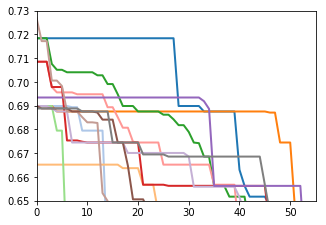

In [13]:
fig, ax = plt.subplots(1, figsize=(5,3.5))

graphs, info = datasets.polbooks
for m_num, measure in enumerate(Kernel.get_all_H_plus_RSP_FE()):
    measureparamdict = {}
    for param in tqdm_notebook(linspace(0, 1, 55), desc=measure.name):
        mean = []
        for edges, nodes in graphs:
            try:
                D = measure.getK(edges, measure.scale().calc(edges, param))
                n_clusters=len(list(set(nodes)))
                y_pred = Ward().predict(D, n_clusters)
                ari = adjusted_rand_score(nodes, y_pred)
                mean.append(ari)
            except KeyboardInterrupt:
                raise KeyboardInterrupt()
            except Exception as e:
                print('Error in {} {}\t| {}'.format(measure.name, param, e))
        mean = [m for m in mean if m is not None and m == m]
        score = np.array(mean).mean()
        if score is not None and score == score:
            measureparamdict[param] = score
    maxparam = max(measureparamdict.items(), key=operator.itemgetter(1))[0]
    print("DONE: {}\tparam: {} score: {}\n\n".format(measure.name, maxparam, measureparamdict[maxparam]))
    measureparamdict = np.array(sorted(measureparamdict.items(), key=operator.itemgetter(1), reverse=True))
    measureparamdict[:, 0]
    plt.plot(range(measureparamdict.shape[0]), measureparamdict[:, 1], color=d3_category20[m_num], label=measure.name, linewidth=2)
plt.xlim(0, 55)
plt.ylim(0.65, .73)

## distance-based Ward (scipy version)

In [8]:
def flat_triangle(D):
    newD = []
    for i in range(D.shape[0]):
        for j in range(i + 1, D.shape[0]):
            newD.append(D[i, j])
    assert len(newD) == D.shape[0] * (D.shape[0] - 1) / 2
    return np.array(newD)


DONE: pWalk	param: 0.02 score: 0.6898595196737533




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\shortcuts.py:21: RuntimeWarning: divide by zero encountered in log
  return np.log(H0)


Error in Walk 0.0	| Linkage 'Z' contains negative counts.


C:\Users\illusionww\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\illusionww\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\shortcuts.py:21: RuntimeWarning: invalid value encountered in log
  return np.log(H0)


Error in Walk 0.02	| Linkage 'Z' uses the same cluster more than once.
Error in Walk 0.04	| Linkage 'Z' uses the same cluster more than once.
Error in Walk 1.0	| Linkage 'Z' contains negative counts.
Error in Walk 0.002	| Linkage 'Z' uses the same cluster more than once.
Error in Walk 0.01	| Linkage 'Z' uses the same cluster more than once.

DONE: Walk	param: 0.22 score: 0.7183469631697055




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\scale.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  return 0.5 * t / (1.0 - t)
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\kernel.py:65: RuntimeWarning: invalid value encountered in multiply
  return np.linalg.pinv(np.eye(size) + t * getL(A))


Error in For 1.0	| On entry to DLASCL parameter number 4 had an illegal value

DONE: For	param: 0.04 score: 0.6652034350034067


Error in logFor 0.0	| Linkage 'Z' contains negative counts.
Error in logFor 1.0	| On entry to DLASCL parameter number 4 had an illegal value
Error in logFor 0.002	| Linkage 'Z' uses the same cluster more than once.

DONE: logFor	param: 0.86 score: 0.6898595196737533


Error in Comm 1.0	| 'NoneType' object has no attribute 'shape'
Error in Comm 0.998	| 'NoneType' object has no attribute 'shape'
Error in Comm 0.99	| 'NoneType' object has no attribute 'shape'

DONE: Comm	param: 0.02 score: 0.6898595196737533


Error in logComm 0.0	| Linkage 'Z' contains negative counts.


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:16: RuntimeWarning: invalid value encountered in power
  return np.power(D, self.power) if self.power != 1 else D


Error in logComm 0.98	| Linkage 'Z' uses the same cluster more than once.
Error in logComm 1.0	| 'NoneType' object has no attribute 'log'
Error in logComm 0.998	| 'NoneType' object has no attribute 'log'
Error in logComm 0.99	| 'NoneType' object has no attribute 'log'

DONE: logComm	param: 0.22 score: 0.7183469631697055




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\kernel.py:108: RuntimeWarning: invalid value encountered in multiply
  return expm(-t * getL(A))


Error in Heat 1.0	| cannot convert float NaN to integer
Error in Heat 0.998	| Linkage 'Z' contains negative counts.

DONE: Heat	param: 0.96 score: 0.7084821777789366


Error in logHeat 0.0	| Linkage 'Z' contains negative counts.
Error in logHeat 1.0	| cannot convert float NaN to integer
Error in logHeat 0.998	| Linkage 'Z' uses the same cluster more than once.

DONE: logHeat	param: 0.96 score: 0.7084821777789366



DONE: SCT	param: 0.44 score: 0.6898595196737533


Error in SCCT 0.52	| Linkage 'Z' uses the same cluster more than once.
Error in SCCT 0.54	| Linkage 'Z' uses the same cluster more than once.
Error in SCCT 0.56	| Linkage 'Z' uses the same cluster more than once.
Error in SCCT 0.58	| Linkage 'Z' uses the same cluster more than once.
Error in SCCT 0.6	| Linkage 'Z' uses the same cluster more than once.
Error in SCCT 0.62	| Linkage 'Z' uses the same cluster more than once.
Error in SCCT 0.64	| Linkage 'Z' uses the same cluster more than once.
Error in SCCT 0.66	| Linkage 'Z' us

C:\Users\illusionww\Documents\GitHub\py_graphs\measure\scale.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  return (1.0 - beta) / beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:90: RuntimeWarning: invalid value encountered in multiply
  W = Pref * np.exp(-beta * C)


Error in RSP 0.0	| On entry to DLASCL parameter number 4 had an illegal value


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:92: RuntimeWarning: divide by zero encountered in true_divide
  S = (Z.dot(C * W).dot(Z)) / Z
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:94: RuntimeWarning: invalid value encountered in add
  Δ_RSP = 0.5 * (C_ + C_.transpose())


Error in RSP 0.02	| Linkage 'Z' contains negative distances.
Error in RSP 0.04	| Linkage 'Z' contains negative distances.
Error in RSP 0.06	| Linkage 'Z' contains negative distances.
Error in RSP 0.08	| Linkage 'Z' contains negative distances.
Error in RSP 0.1	| Linkage 'Z' contains negative distances.
Error in RSP 0.12	| Linkage 'Z' contains negative distances.
Error in RSP 0.14	| Linkage 'Z' contains negative distances.
Error in RSP 0.16	| Linkage 'Z' contains negative distances.
Error in RSP 0.18	| Linkage 'Z' contains negative distances.
Error in RSP 0.2	| Linkage 'Z' contains negative distances.
Error in RSP 1.0	| Linkage 'Z' contains negative distances.


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:92: RuntimeWarning: invalid value encountered in true_divide
  S = (Z.dot(C * W).dot(Z)) / Z


Error in RSP 0.002	| Linkage 'Z' contains negative distances.
Error in RSP 0.01	| Linkage 'Z' contains negative distances.

DONE: RSP	param: 0.8200000000000001 score: 0.7171392377949803




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:114: RuntimeWarning: invalid value encountered in multiply
  W = Pref * np.exp(-beta * C)


Error in FE 0.0	| On entry to DLASCL parameter number 4 had an illegal value


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: divide by zero encountered in log
  Φ = np.log(Zh) / -beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: invalid value encountered in log
  Φ = np.log(Zh) / -beta


Error in FE 0.02	| Linkage 'Z' contains negative counts.
Error in FE 0.04	| Linkage 'Z' contains negative counts.
Error in FE 0.06	| Linkage 'Z' contains negative counts.
Error in FE 0.08	| Linkage 'Z' contains negative counts.
Error in FE 0.1	| Linkage 'Z' uses the same cluster more than once.
Error in FE 0.12	| Linkage 'Z' uses the same cluster more than once.
Error in FE 0.14	| Linkage 'Z' uses the same cluster more than once.
Error in FE 0.16	| Linkage 'Z' uses the same cluster more than once.
Error in FE 0.18	| Linkage 'Z' uses the same cluster more than once.
Error in FE 0.2	| Linkage 'Z' uses the same cluster more than once.


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: divide by zero encountered in true_divide
  Φ = np.log(Zh) / -beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: invalid value encountered in true_divide
  Φ = np.log(Zh) / -beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:120: RuntimeWarning: invalid value encountered in subtract
  return Δ_FE - np.diag(np.diag(Δ_FE))


Error in FE 1.0	| Linkage 'Z' uses non-singleton cluster before it is formed.
Error in FE 0.002	| Linkage 'Z' contains negative counts.
Error in FE 0.01	| Linkage 'Z' contains negative counts.

DONE: FE	param: 0.78 score: 0.6888336748547904


Error in SP-CT 0.0	| Linkage 'Z' uses the same cluster more than once.

DONE: SP-CT	param: 0.88 score: 0.6955858670354121




(0.65, 0.73)

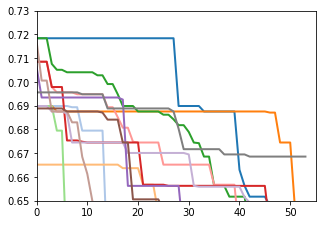

In [14]:
fig, ax = plt.subplots(1, figsize=(5,3.5))

graphs, info = datasets.polbooks
for m_num, measure in enumerate(Distance.get_all()):
    measureparamdict = {}
    for param in tqdm_notebook(linspace(0, 1, 55), desc=measure.name):
        mean = []
        for edges, nodes in graphs:
            try:
                D = measure.getD(edges, measure.scale().calc(edges, param))
                n_clusters=len(list(set(nodes)))
                
                n = int(D.shape[0] * (D.shape[0] - 1) / 2)
                D = flat_triangle(D)
                
                y_pred = fcluster(ward(D), n_clusters, criterion='maxclust')
                ari = adjusted_rand_score(nodes, y_pred)
                mean.append(ari)
            except KeyboardInterrupt:
                raise KeyboardInterrupt()
            except Exception as e:
                print('Error in {} {}\t| {}'.format(measure.name, param, e))
        mean = [m for m in mean if m is not None and m == m]
        score = np.array(mean).mean()
        if score is not None and score == score:
            measureparamdict[param] = score
    maxparam = max(measureparamdict.items(), key=operator.itemgetter(1))[0]
    print("DONE: {}\tparam: {} score: {}\n\n".format(measure.name, maxparam, measureparamdict[maxparam]))
    measureparamdict = np.array(sorted(measureparamdict.items(), key=operator.itemgetter(1), reverse=True))
    measureparamdict[:, 0]
    plt.plot(range(measureparamdict.shape[0]), measureparamdict[:, 1], color=d3_category20[m_num], label=measure.name, linewidth=2)
plt.xlim(0, 55)
plt.ylim(0.65, .73)

## object-feature based (sklearn version)

Error in pWalk H 1.0	| Not positive definite


C:\Users\illusionww\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\illusionww\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



DONE: pWalk H	param: 0.02 score: 0.6898595196737533




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\shortcuts.py:21: RuntimeWarning: divide by zero encountered in log
  return np.log(H0)


Error in Walk H 0.0	| Array must not contain infs or NaNs


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\shortcuts.py:21: RuntimeWarning: invalid value encountered in log
  return np.log(H0)


Error in Walk H 0.02	| Array must not contain infs or NaNs
Error in Walk H 0.04	| Array must not contain infs or NaNs
Error in Walk H 0.06	| Not positive definite
Error in Walk H 0.08	| Not positive definite
Error in Walk H 0.1	| Not positive definite
Error in Walk H 0.12	| Not positive definite
Error in Walk H 0.14	| Not positive definite
Error in Walk H 0.16	| Not positive definite
Error in Walk H 0.18	| Not positive definite
Error in Walk H 0.2	| Not positive definite
Error in Walk H 0.22	| Not positive definite
Error in Walk H 0.24	| Not positive definite
Error in Walk H 0.26	| Not positive definite
Error in Walk H 0.28	| Not positive definite
Error in Walk H 0.3	| Not positive definite
Error in Walk H 0.32	| Not positive definite
Error in Walk H 0.34	| Not positive definite
Error in Walk H 0.36	| Not positive definite
Error in Walk H 0.38	| Not positive definite
Error in Walk H 0.4	| Not positive definite
Error in Walk H 0.42	| Not positive definite
Error in Walk H 0.44	| Not posi

C:\Users\illusionww\Documents\GitHub\py_graphs\measure\scale.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  return 0.5 * t / (1.0 - t)
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\kernel.py:65: RuntimeWarning: invalid value encountered in multiply
  return np.linalg.pinv(np.eye(size) + t * getL(A))


Error in For H 1.0	| On entry to DLASCL parameter number 4 had an illegal value

DONE: For H	param: 0.04 score: 0.6652034350034067


Error in logFor H 0.0	| Array must not contain infs or NaNs
Error in logFor H 0.02	| Not positive definite
Error in logFor H 0.04	| Not positive definite
Error in logFor H 0.06	| Not positive definite
Error in logFor H 0.08	| Not positive definite
Error in logFor H 0.1	| Not positive definite
Error in logFor H 0.12	| Not positive definite
Error in logFor H 0.14	| Not positive definite
Error in logFor H 0.16	| Not positive definite
Error in logFor H 0.18	| Not positive definite
Error in logFor H 0.2	| Not positive definite
Error in logFor H 0.22	| Not positive definite
Error in logFor H 0.24	| Not positive definite
Error in logFor H 0.26	| Not positive definite
Error in logFor H 0.28	| Not positive definite
Error in logFor H 0.3	| Not positive definite
Error in logFor H 0.32	| Not positive definite
Error in logFor H 0.34	| Not positive definite
Error in lo

C:\Users\illusionww\Documents\GitHub\py_graphs\measure\kernel.py:108: RuntimeWarning: invalid value encountered in multiply
  return expm(-t * getL(A))


Error in Heat H 1.0	| cannot convert float NaN to integer
Error in Heat H 0.998	| Not positive definite
Error in Heat H 0.99	| Not positive definite

DONE: Heat H	param: 0.62 score: 0.6955858670354121


Error in logHeat H 0.0	| Array must not contain infs or NaNs
Error in logHeat H 0.02	| Not positive definite
Error in logHeat H 0.04	| Not positive definite
Error in logHeat H 0.06	| Not positive definite
Error in logHeat H 0.08	| Not positive definite
Error in logHeat H 0.1	| Not positive definite
Error in logHeat H 0.12	| Not positive definite
Error in logHeat H 0.14	| Not positive definite
Error in logHeat H 0.16	| Not positive definite
Error in logHeat H 0.18	| Not positive definite
Error in logHeat H 0.2	| Not positive definite
Error in logHeat H 0.22	| Not positive definite
Error in logHeat H 0.24	| Not positive definite
Error in logHeat H 0.26	| Not positive definite
Error in logHeat H 0.28	| Not positive definite
Error in logHeat H 0.3	| Not positive definite
Error in logHeat H 

C:\Users\illusionww\Documents\GitHub\py_graphs\measure\scale.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  return (1.0 - beta) / beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:90: RuntimeWarning: invalid value encountered in multiply
  W = Pref * np.exp(-beta * C)


Error in RSP K 0.0	| On entry to DLASCL parameter number 4 had an illegal value


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:92: RuntimeWarning: divide by zero encountered in true_divide
  S = (Z.dot(C * W).dot(Z)) / Z
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:94: RuntimeWarning: invalid value encountered in add
  Δ_RSP = 0.5 * (C_ + C_.transpose())


Error in RSP K 0.02	| Array must not contain infs or NaNs
Error in RSP K 0.04	| Array must not contain infs or NaNs
Error in RSP K 0.06	| Array must not contain infs or NaNs
Error in RSP K 0.08	| Array must not contain infs or NaNs
Error in RSP K 0.1	| Array must not contain infs or NaNs
Error in RSP K 0.12	| Array must not contain infs or NaNs
Error in RSP K 0.14	| Array must not contain infs or NaNs
Error in RSP K 0.16	| Array must not contain infs or NaNs
Error in RSP K 0.18	| Not positive definite
Error in RSP K 0.2	| Not positive definite
Error in RSP K 0.22	| Not positive definite
Error in RSP K 0.24	| Not positive definite
Error in RSP K 0.26	| Not positive definite
Error in RSP K 0.28	| Not positive definite
Error in RSP K 0.3	| Not positive definite
Error in RSP K 0.32	| Not positive definite
Error in RSP K 0.34	| Not positive definite
Error in RSP K 0.36	| Not positive definite
Error in RSP K 0.38	| Not positive definite
Error in RSP K 0.4	| Not positive definite
Error in RSP

C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:92: RuntimeWarning: invalid value encountered in true_divide
  S = (Z.dot(C * W).dot(Z)) / Z


Error in RSP K 0.002	| Array must not contain infs or NaNs
Error in RSP K 0.01	| Array must not contain infs or NaNs

DONE: RSP K	param: 0.98 score: 0.6875568571981947




C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:114: RuntimeWarning: invalid value encountered in multiply
  W = Pref * np.exp(-beta * C)


Error in FE K 0.0	| On entry to DLASCL parameter number 4 had an illegal value


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: divide by zero encountered in log
  Φ = np.log(Zh) / -beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: invalid value encountered in log
  Φ = np.log(Zh) / -beta


Error in FE K 0.02	| Array must not contain infs or NaNs
Error in FE K 0.04	| Array must not contain infs or NaNs
Error in FE K 0.06	| Array must not contain infs or NaNs
Error in FE K 0.08	| Array must not contain infs or NaNs
Error in FE K 0.1	| Array must not contain infs or NaNs
Error in FE K 0.12	| Array must not contain infs or NaNs
Error in FE K 0.14	| Array must not contain infs or NaNs
Error in FE K 0.16	| Array must not contain infs or NaNs
Error in FE K 0.18	| Array must not contain infs or NaNs
Error in FE K 0.2	| Array must not contain infs or NaNs
Error in FE K 0.22	| Not positive definite
Error in FE K 0.24	| Not positive definite
Error in FE K 0.26	| Not positive definite
Error in FE K 0.28	| Not positive definite
Error in FE K 0.3	| Not positive definite
Error in FE K 0.32	| Not positive definite
Error in FE K 0.34	| Not positive definite
Error in FE K 0.36	| Not positive definite
Error in FE K 0.38	| Not positive definite
Error in FE K 0.4	| Not positive definite
Erro

C:\Users\illusionww\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:1055: ComplexWarning: Casting complex values to real discards the imaginary part
  X = X.astype(np.double)


Error in FE K 0.98	| Not positive definite


C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: divide by zero encountered in true_divide
  Φ = np.log(Zh) / -beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:118: RuntimeWarning: invalid value encountered in true_divide
  Φ = np.log(Zh) / -beta
C:\Users\illusionww\Documents\GitHub\py_graphs\measure\distance.py:120: RuntimeWarning: invalid value encountered in subtract
  return Δ_FE - np.diag(np.diag(Δ_FE))


Error in FE K 1.0	| Array must not contain infs or NaNs
Error in FE K 0.002	| Array must not contain infs or NaNs
Error in FE K 0.01	| Array must not contain infs or NaNs

DONE: FE K	param: 0.92 score: 0.6875568571981947


Error in SP-CT H 0.0	| Not positive definite
Error in SP-CT H 0.02	| Not positive definite
Error in SP-CT H 0.04	| Not positive definite
Error in SP-CT H 0.06	| Not positive definite
Error in SP-CT H 0.08	| Not positive definite
Error in SP-CT H 0.1	| Not positive definite
Error in SP-CT H 0.12	| Not positive definite
Error in SP-CT H 0.14	| Not positive definite
Error in SP-CT H 0.16	| Not positive definite
Error in SP-CT H 0.18	| Not positive definite
Error in SP-CT H 0.2	| Not positive definite
Error in SP-CT H 0.22	| Not positive definite
Error in SP-CT H 0.24	| Not positive definite
Error in SP-CT H 0.26	| Not positive definite
Error in SP-CT H 0.28	| Not positive definite
Error in SP-CT H 0.3	| Not positive definite
Error in SP-CT H 0.32	| Not positive definite

(0.64, 0.73)

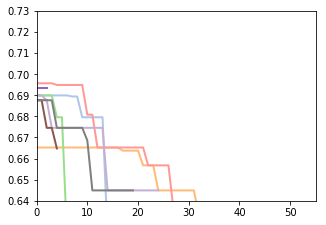

In [10]:
fig, ax = plt.subplots(1, figsize=(5,3.5))

graphs, info = datasets.polbooks
for m_num, measure in enumerate(Kernel.get_all_H_plus_RSP_FE()):
    measureparamdict = {}
    for param in tqdm_notebook(linspace(0, 1, 55), desc=measure.name):
        mean = []
        for edges, nodes in graphs:
            try:
                D = measure.getK(edges, measure.scale().calc(edges, param))
                if not is_semipos_def(D):
                    raise Exception('Not positive definite')
                D = sqrtm(D).T
                n_clusters=len(list(set(nodes)))
                y_pred = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(D)
                ari = adjusted_rand_score(nodes, y_pred)
                mean.append(ari)
            except KeyboardInterrupt:
                raise KeyboardInterrupt()
            except Exception as e:
                print('Error in {} {}\t| {}'.format(measure.name, param, e))
        mean = [m for m in mean if m is not None and m == m]
        score = np.array(mean).mean()
        if score is not None and score == score:
            measureparamdict[param] = score
    if len(measureparamdict) == 0:
        print('Not positive devinite ' + measure.name)
        continue
    maxparam = max(measureparamdict.items(), key=operator.itemgetter(1))[0]
    print("DONE: {}\tparam: {} score: {}\n\n".format(measure.name, maxparam, measureparamdict[maxparam]))
    measureparamdict = np.array(sorted(measureparamdict.items(), key=operator.itemgetter(1), reverse=True))
    measureparamdict[:, 0]
    plt.plot(range(measureparamdict.shape[0]), measureparamdict[:, 1], color=d3_category20[m_num], label=measure.name, linewidth=2)
plt.xlim(0, 55)
plt.ylim(0.64, .73)